<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Phillip/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TechLabs final project 
## (Problem 2 - Group 8)

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Alejandro Echavarria, Juliana Bedoya, Laura Laks, Luca Wulfert, Marco Stoever and Phillip Guske

---

# Data Preparation

### libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
countries_csv_url = 'https://raw.githubusercontent.com/rechavar/pyCovid_TechLabsProj/master/countries.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [0]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)
df_countries = pd.read_csv(countries_csv_url)

In [0]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84


In [0]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4


In [0]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,771,777,783,789,795,803,812,823,851,857
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,652,653,653,663,676,676,681,684,692
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,18,18,18,18,18,18,18,18


In [0]:
pd.set_option('display.max_rows', 300)

print(df_confirmed.iloc[:,1:2])
print(df_death.iloc[:,1:2])
print(df_recovered.iloc[:,1:2])

#Taiwan is written with an asterisk (*) at the end, we have to change this:
#We also want to have "USA" instead of "US":
#Congo (Brazzaville) and Congo (Kinshasa) are capitals of different countries!
#Brazzaville -> Republic of the Congo || Kinshasa -> Democratic Republic of the Congo

#We will change this in the data cleaning part

                       Country/Region
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                           Australia
10                          Australia
11                          Australia
12                          Australia
13                          Australia
14                          Australia
15                          Australia
16                            Austria
17                         Azerbaijan
18                            Bahamas
19                            Bahrain
20                         Bangladesh
21                           Barbados
22                            Belarus
23                            Belgium
24                              Benin
25          

In [0]:
#reset max_rows displayed to default number (10):
pd.set_option('display.max_rows', 10)

In [0]:
all_dataframes = {'confirmed': df_confirmed,
                  'death': df_death,
                  'recovered': df_recovered,
                  'countries': df_countries}

### Data Cleaning

In [0]:
for key, df in all_dataframes.items():
  print('cleaning: {}'.format(key))

  if key == 'countries':
    continue

  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)

  #Grouping together countries originally split into multiple Provinces/States
  #(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
  df = df.groupby(by = df.index, axis = 0).sum()

  # Addition of a "global" row
  df.loc['Global'] = df.sum(axis=0)

  #transpose
  df=df.T
  df.rename_axis(index='Date', columns="Country",inplace=True)
  df.index = pd.to_datetime(df.index)

  #Naming the Date index:
  df.index.rename("Date", inplace= True)

  #Creating a datetime index:
  df.index = pd.to_datetime(df.index)
  
  #Save new dataFrame
  all_dataframes[key] = df

# Change country names in df_countries
old_names = [ 'Myanmar [Burma]', 'Cape Verde',  "C?te d'Ivoire", 'Czech Republic',
             'Congo [DRC]',  'Swaziland', 'Vatican City',  'South Korea', 'Macedonia [FYROM]',
              'Congo [Republic]',  'S?o Tom? and Pr?ncipe',  'United States',  'Gaza Strip','Sudan']

new_names = ['Burma', 'Cabo Verde', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of the Congo',
              'Eswatini',  'Holy See',  'Korea, South',  'North Macedonia',  'Republic of the Congo',
             'Sao Tome and Principe', 'USA',  'West Bank and Gaza','South Sudan']

all_dataframes['countries'] = all_dataframes['countries'].replace(old_names, new_names)

cleaning: confirmed
cleaning: death
cleaning: recovered
cleaning: countries


In [0]:
all_dataframes['confirmed']
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26,11831,1029,8697,763,70,25,13228,7402,7139,16557,...,789,3290,1211,327,429,9,249,920,56,5589626
2020-05-27,12456,1050,8857,763,71,25,13933,7774,7150,16591,...,803,3369,1245,327,434,9,256,1057,132,5691790
2020-05-28,13036,1076,8997,763,74,25,14702,8216,7165,16628,...,811,3444,1325,327,446,9,278,1057,149,5808946


### New Dataframe: Active Cases

In [0]:
all_dataframes['active'] = all_dataframes['confirmed'] - all_dataframes['recovered'] - all_dataframes['death']

### Calculating Projections

In [0]:
def create_country(country):
  country_confirmed=all_dataframes["confirmed"].loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in all_dataframes["confirmed"].columns}

In [0]:
from datetime import timedelta

def create_projection(country):
  
  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=21, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]
  
    
  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']
         
  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
    
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
        
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in all_dataframes["confirmed"].columns}

In [0]:
def add_more_projections(country):
  projection_dataframes[country]['Death Cases']=all_dataframes['death'][country]
  projection_dataframes[country]['Recovered Cases']=all_dataframes['recovered'][country]
  projection_dataframes[country]['Active Cases']=(projection_dataframes[country]['Total Cases']
                                                    -projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Recovered Cases'])
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))

  Recovered_Rate=projection_dataframes[country]['Recovered Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()
  Death_Rate=projection_dataframes[country]['Death Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()

  for date in projection_dataframes[country].index:
      if projection_dataframes[country].loc[date, 'Prediction']:
        projection_dataframes[country].loc[date, 'Recovered Cases']=(Recovered_Rate*projection_dataframes[country].shift(1).loc[date, 'Active Cases']
                                                                       +projection_dataframes[country].shift(1).loc[date, 'Recovered Cases'])
        projection_dataframes[country].loc[date, 'Death Cases']=(Death_Rate*projection_dataframes[country].shift(21).loc[date, 'New Cases']
                                                                   +projection_dataframes[country].shift(1).loc[date, 'Death Cases'])
        projection_dataframes[country].loc[date, 'Active Cases']=(projection_dataframes[country].loc[date, 'Total Cases']
                                                                    -projection_dataframes[country].loc[date, 'Recovered Cases']
                                                                    -projection_dataframes[country].loc[date, 'Death Cases'])
      
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))  
                                                                 
for country in all_dataframes["confirmed"].columns:
  add_more_projections(country)

### Machine Learning Approach

In [0]:
#%pip install fbprophet

     |████████████████████████████████| 54 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 67.3 MB 113 kB/s  eta 0:00:01
     |████████████████████████████████| 43 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 110 kB 75.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 67.7 MB/s eta 0:00:01
     |████████████████████████████████| 732 kB 82.0 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /usr/local/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6xxkb5dz/fbprophet/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6xxkb5dz/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-kod3rm__
       cwd: /tmp/pip-install-6xxkb5dz/fbprophet/
  Complete output (44 lines):
  running bdist_wheel
  running build
  running bu

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [0]:
countrywise = pd.DataFrame()
countrywise['Country'] = all_dataframes['confirmed'].columns
countrywise = countrywise.set_index('Country')
countrywise['Confirmed'] = all_dataframes['confirmed'].iloc[-1,:]
countrywise['Death'] = all_dataframes['death'].iloc[-1,:]
countrywise['Recovered'] = all_dataframes['recovered'].iloc[-1,:]
countrywise['Active'] = all_dataframes['active'].iloc[-1,:]
countrywise.head()

,Confirmed,Death,Recovered,Active
Country,,,,
Afghanistan,14525,249,1303,12973
Albania,1122,33,857,232
Algeria,9267,646,5549,3072
Andorra,764,51,692,21
Angola,84,4,18,62


In [0]:
countrywise['Mortality'] = (countrywise['Death']/countrywise['Confirmed'])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise['Survival porbability'] = 100 - countrywise['Mortality']

In [0]:
datewise = pd.DataFrame()
datewise['Date'] = all_dataframes['active'].index
datewise['Recovered'] = all_dataframes['recovered']['Global'].values
datewise['Confirmed'] = all_dataframes['confirmed']['Global'].values
datewise['Death'] = all_dataframes['death']['Global'].values
datewise['Active'] = all_dataframes['active']['Global'].values
datewise['Closed'] = datewise['Recovered'] + datewise['Death']
datewise = datewise.set_index('Date')

In [0]:
datewise['Mortality'] = datewise['Death']/datewise['Confirmed']*100
datewise['Recovery'] = datewise['Recovered']/datewise['Confirmed']*100
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery
Date,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045
2020-01-23,30,654,18,606,48,2.752294,4.587156
2020-01-24,36,941,26,879,62,2.763018,3.825717
2020-01-25,39,1434,42,1353,81,2.928870,2.719665
2020-01-26,52,2118,56,2010,108,2.644004,2.455146
...,...,...,...,...,...,...,...
2020-05-26,2286956,5589626,350452,2952218,2637408,6.269686,40.914294
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085
2020-05-28,2415960,5808946,360308,3032678,2776268,6.202640,41.590333


In [0]:
datewise['Days since'] = datewise.index-datewise.index[0]
datewise['Days since'] = datewise["Days since"].dt.days
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery,Days since
Date,,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045,0
2020-01-23,30,654,18,606,48,2.752294,4.587156,1
2020-01-24,36,941,26,879,62,2.763018,3.825717,2
2020-01-25,39,1434,42,1353,81,2.928870,2.719665,3
2020-01-26,52,2118,56,2010,108,2.644004,2.455146,4
...,...,...,...,...,...,...,...,...
2020-05-26,2286956,5589626,350452,2952218,2637408,6.269686,40.914294,125
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085,126
2020-05-28,2415960,5808946,360308,3032678,2776268,6.202640,41.590333,127


#### Predictions using ML models

In [0]:
train = datewise.iloc[:int(datewise.shape[0] * 0.90)]
val = datewise.iloc[int(datewise.shape[0] * 0.90):]
models = {}

Polynomial regression

In [0]:
poly = PolynomialFeatures(degree = 10)
xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))
polyRegression = LinearRegression(normalize=True)
polyRegression.fit(xtrain_poly, train['Confirmed'])
predictions = polyRegression.predict(xvalid_poly)
rmse_poly = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error: ', rmse_poly)
x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
y_hat_poly = polyRegression.predict(x_poly)

Error:  260303.41032079305


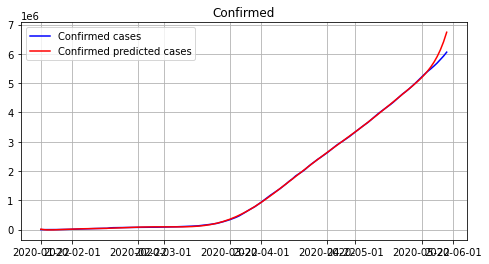

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_poly,'Confirmed')

Support vector machine

Error:  847374.6101863071


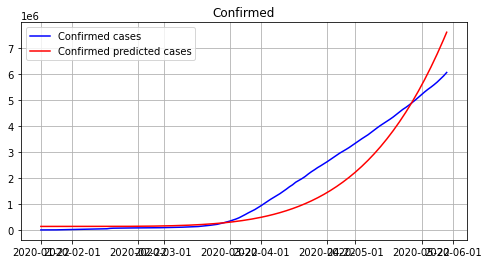

In [0]:
svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_svm = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_svm)
y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_svm,'Confirmed')

Ensemble method : Ada Boost 

Error:  895281.5029518193


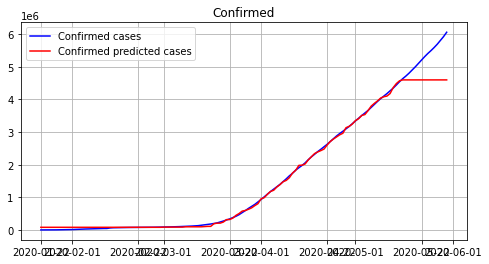

In [0]:
adam = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
adam.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = adam.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_adam = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_adam)
y_hat_adam = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_adam, 'Confirmed')

Facebook's prophet

In [0]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [0]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [0]:
forecast_c

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
142,2020-06-12
143,2020-06-13
144,2020-06-14
145,2020-06-15


In [0]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [0]:
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -1.215518e+04 -4.296174e+04  1.798285e+04
1   2020-01-23 -5.441238e+03 -3.632919e+04  2.677069e+04
2   2020-01-24  2.469201e+03 -2.848286e+04  3.402165e+04
3   2020-01-25  7.434877e+03 -2.539284e+04  3.739234e+04
4   2020-01-26  3.070153e+03 -2.749768e+04  3.578015e+04
..         ...           ...           ...           ...
142 2020-06-12  7.172890e+06  7.003303e+06  7.337883e+06
143 2020-06-13  7.268325e+06  7.080907e+06  7.449049e+06
144 2020-06-14  7.354430e+06  7.145161e+06  7.549198e+06
145 2020-06-15  7.443351e+06  7.217984e+06  7.660287e+06
146 2020-06-16  7.533784e+06  7.292895e+06  7.772258e+06

[147 rows x 4 columns]


Figure(720x432)


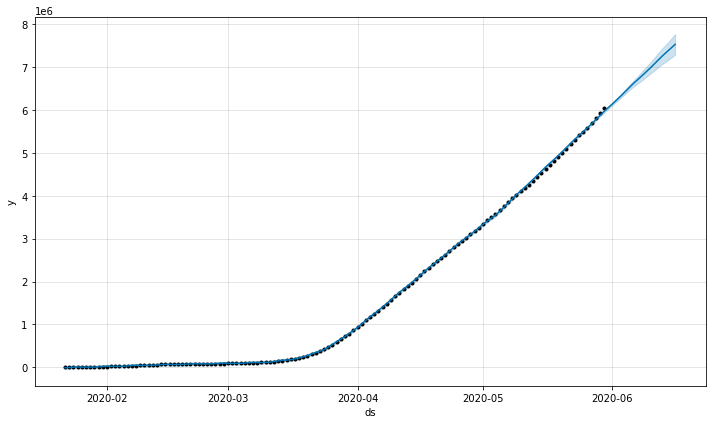

In [0]:
print(prophet_c.plot(confirmed_forecast))

In [0]:
prophet_rmse = np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))

In [0]:
print('Error: ', prophet_rmse)

Error:  15711.133274735053


We chose 4 models to apply to each country and each case type.  <br> Those models are: Facebook's prophet, Polynomial regression, Ada boost and Support vector machine

In [0]:
def apply_fb_prophet(database, case, plot = True):
  prophet=Prophet(interval_width=0.95,weekly_seasonality=True)
  prophet_=pd.DataFrame(zip(list(database.index),list(database[case])),columns=['ds','y'])

  prophet.fit(prophet_)

  forecast=prophet.make_future_dataframe(periods=17)
  forecast_confirmed=forecast.copy()
  confirmed_forecast=prophet.predict(forecast)
  if plot:
    print(prophet.plot(confirmed_forecast))

  return prophet                 

In [0]:
def apply_poly(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  poly = PolynomialFeatures(degree = 10) 

  xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
  xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))

  polyRegression = LinearRegression(normalize=True)
  polyRegression.fit(xtrain_poly, train[case])

  predictions = polyRegression.predict(xvalid_poly)
  rmse_poly = np.sqrt(mean_squared_error(val[case],predictions))
  print('Error: ', rmse_poly)

  x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
  y_hat_poly = polyRegression.predict(x_poly) 
  if plot:
    plot_model(database.index, database[case], y_hat_poly, case)

  return polyRegression 

In [0]:
def apply_svm(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
  svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  
  predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_svm = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_svm)

  y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_svm, case)
  return svm

In [0]:
def apply_ada(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]  

  ada = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
  ada.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  predictions = ada.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_adam = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_adam)
  y_hat_adam = ada.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_adam, case)
  return ada

Applying each model to death and recovered cases

FACEBOOK PROPHET

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


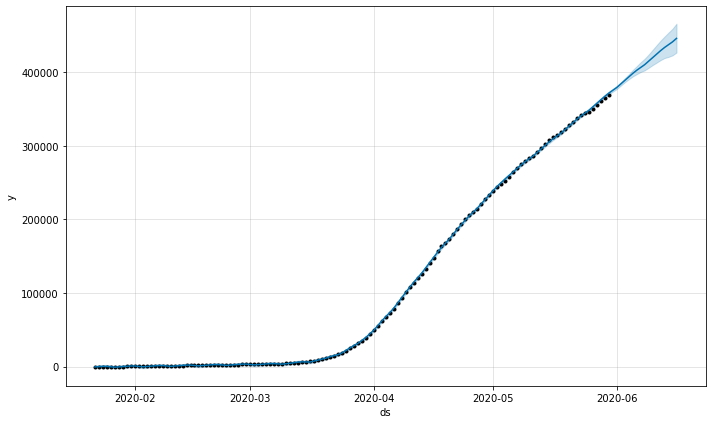

In [0]:
fb_death = apply_fb_prophet(datewise, 'Death')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


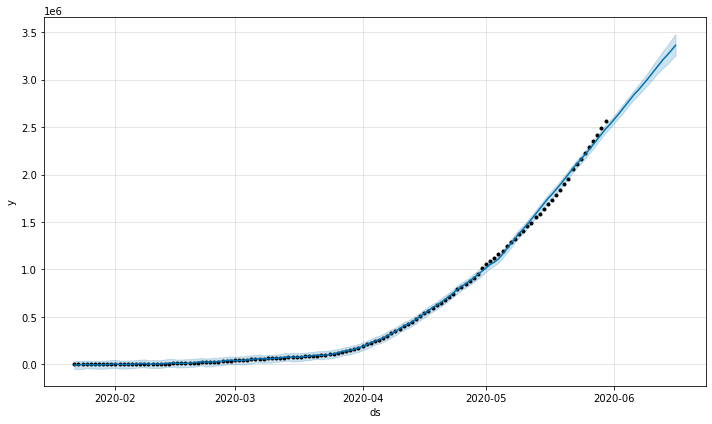

In [0]:
fb_recovered = apply_fb_prophet(datewise, 'Recovered')

POLYNOMIAL REGRESSOR

Error:  2606.5310102456583


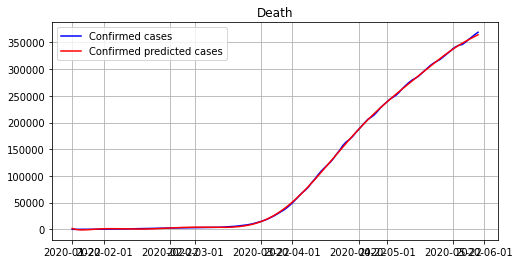

In [0]:
poly_death = apply_poly(datewise, 'Death')

Error:  282015.2076768943


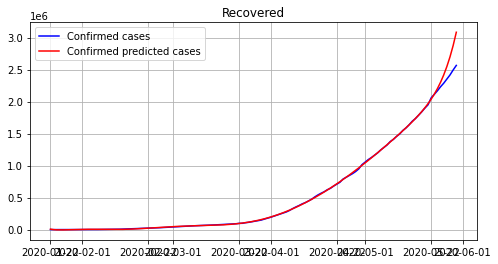

In [0]:
poly_recovered = apply_poly(datewise, 'Recovered')

SVM

Error:  197278.7164830078


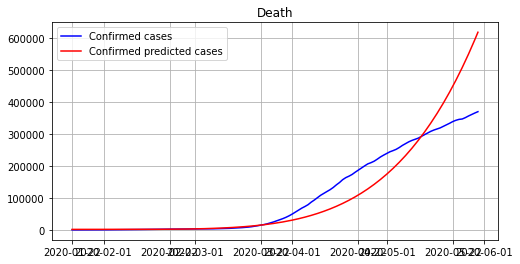

In [0]:
svm_death = apply_svm(datewise, 'Death')

Error:  228168.10299140585


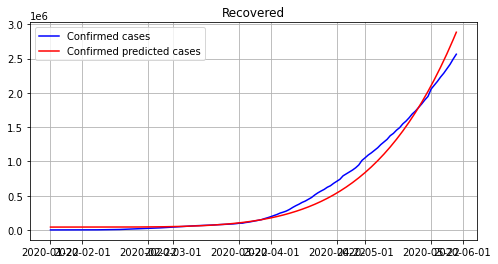

In [0]:
svm_recovered = apply_svm(datewise,'Recovered')

Ada boost

Error:  22143.33378058435


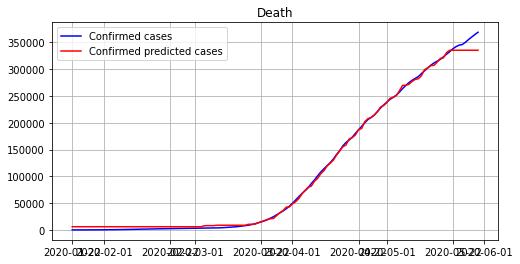

In [0]:
ada_death = apply_ada(datewise,'Death')

Error:  331236.3182093593


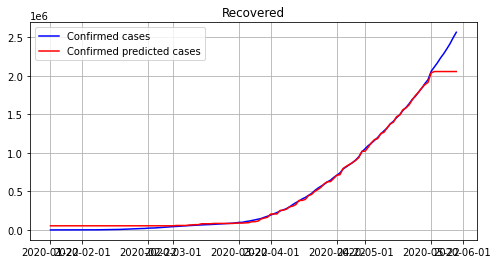

In [0]:
ada_recovered = apply_ada(datewise,'Recovered')

In [0]:
def make_datewise(country):
  datewise = pd.DataFrame()
  datewise['Date'] = all_dataframes['active'].index
  datewise['Recovered'] = all_dataframes['recovered'][country].values
  datewise['Confirmed'] = all_dataframes['confirmed'][country].values
  datewise['Death'] = all_dataframes['death'][country].values
  datewise['Active'] = all_dataframes['active'][country].values
  datewise['Closed'] = datewise['Recovered'] + datewise['Death']
  datewise = datewise.set_index('Date')
  datewise['Days since'] = datewise.index-datewise.index[0]
  datewise['Days since'] = datewise["Days since"].dt.days
  return datewise

In [0]:
all_datewise = {}
for country in countrywise.index:
  print('country: ', country)
  all_datewise[country] = make_datewise(country)

country:  Afghanistan
country:  Albania
country:  Algeria
country:  Andorra
country:  Angola
country:  Antigua and Barbuda
country:  Argentina
country:  Armenia
country:  Australia
country:  Austria
country:  Azerbaijan
country:  Bahamas
country:  Bahrain
country:  Bangladesh
country:  Barbados
country:  Belarus
country:  Belgium
country:  Belize
country:  Benin
country:  Bhutan
country:  Bolivia
country:  Bosnia and Herzegovina
country:  Botswana
country:  Brazil
country:  Brunei
country:  Bulgaria
country:  Burkina Faso
country:  Burma
country:  Burundi
country:  Cabo Verde
country:  Cambodia
country:  Cameroon
country:  Canada
country:  Central African Republic
country:  Chad
country:  Chile
country:  China
country:  Colombia
country:  Comoros
country:  Costa Rica
country:  Cote d'Ivoire
country:  Croatia
country:  Cuba
country:  Cyprus
country:  Czechia
country:  Democratic Republic of the Congo
country:  Denmark
country:  Diamond Princess
country:  Djibouti
country:  Dominica
coun

In [0]:
all_datewise

{'Afghanistan':             Recovered  Confirmed  Death  Active  Closed  Days since
 Date                                                               
 2020-01-22          0          0      0       0       0           0
 2020-01-23          0          0      0       0       0           1
 2020-01-24          0          0      0       0       0           2
 2020-01-25          0          0      0       0       0           3
 2020-01-26          0          0      0       0       0           4
 ...               ...        ...    ...     ...     ...         ...
 2020-05-26       1128      11831    220   10483    1348         125
 2020-05-27       1138      12456    227   11091    1365         126
 2020-05-28       1209      13036    235   11592    1444         127
 2020-05-29       1259      13659    246   12154    1505         128
 2020-05-30       1303      14525    249   12973    1552         129
 
 [130 rows x 6 columns],
 'Albania':             Recovered  Confirmed  Death  Active  

In [1]:
#The next calculations are seperated bc they take a long time

models_country = {}
for key, datewise in all_datewise.items():
  models_case = {}
  print('The country is: ', key)
  print('Facebook prophet for: ', key)
  models_case['Facebook Prophet Confirmed'] = apply_fb_prophet(datewise,'Confirmed', plot = False)
  models_case['Facebook Prophet Death'] = apply_fb_prophet(datewise,'Death', plot = False)
  models_case['Facebook Prophet Recovered'] = apply_fb_prophet(datewise,'Recovered', plot = False)


NameError: ignored

In [0]:
for key, datewise in all_datewise.items():
  print('The country is: ', key)
  
  print('Polynomial regression for: ', key)
  models_case['Poly Confirmed'] = apply_poly(datewise,'Confirmed', plot = False)
  models_case['Poly Death'] = apply_poly(datewise,'Death', plot = False)
  models_case['Poly Recovered'] = apply_poly(datewise,'Recovered', plot = False)


The country is:  Afghanistan
Polynomial regression for:  Afghanistan
Error:  2074.0510243611393
Error:  49.11348202343105
Error:  75.17943562293608
The country is:  Albania
Polynomial regression for:  Albania
Error:  18.265856537223975
Error:  30.244596519865254
Error:  100.8219023801978
The country is:  Algeria
Polynomial regression for:  Algeria
Error:  1370.1078438493444
Error:  123.16954819748344
Error:  1346.8271402893047
The country is:  Andorra
Polynomial regression for:  Andorra
Error:  391.9082156986481
Error:  14.108401193916905
Error:  209.1793767444715
The country is:  Angola
Polynomial regression for:  Angola
Error:  43.487546437005264
Error:  7.811870375557711
Error:  3.2108372839583454
The country is:  Antigua and Barbuda
Polynomial regression for:  Antigua and Barbuda
Error:  15.343488832996643
Error:  3.6116200208628912
Error:  4.372437803423676
The country is:  Argentina
Polynomial regression for:  Argentina
Error:  2725.950962647339
Error:  41.3953256939035
Error:  6

Polynomial regression for:  Germany
Error:  74876.83885362238
Error:  978.5108485449318
Error:  9276.80061793173
The country is:  Ghana
Polynomial regression for:  Ghana
Error:  1054.2592459556076
Error:  7.0259538484701345
Error:  4050.7515006632666
The country is:  Greece
Polynomial regression for:  Greece
Error:  747.3779532765309
Error:  47.374583327042934
Error:  2306.089020512209
The country is:  Grenada
Polynomial regression for:  Grenada
Error:  27.44902655185932
Error:  0.0
Error:  4.999435063846108
The country is:  Guatemala
Polynomial regression for:  Guatemala
Error:  289.9050363172132
Error:  11.973952945300061
Error:  116.79082497368371
The country is:  Guinea
Polynomial regression for:  Guinea
Error:  230.6127290404506
Error:  14.079446766522345
Error:  312.9648468848212
The country is:  Guinea-Bissau
Polynomial regression for:  Guinea-Bissau
Error:  202.95935149787272
Error:  0.47412578842026787
Error:  36.61065777612014
The country is:  Guyana
Polynomial regression for

Error:  14.962917048165178
Error:  905.5858498389822
The country is:  Pakistan
Polynomial regression for:  Pakistan
Error:  8673.616232692064
Error:  248.1274222977989
Error:  5994.084148499091
The country is:  Panama
Polynomial regression for:  Panama
Error:  274.3002387199207
Error:  8.382599399540279
Error:  9844.544876516444
The country is:  Papua New Guinea
Polynomial regression for:  Papua New Guinea
Error:  14.769361373835338
Error:  0.0
Error:  20.905888276070055
The country is:  Paraguay
Polynomial regression for:  Paraguay
Error:  165.82816314001332
Error:  4.019421033164864
Error:  90.19892538233583
The country is:  Peru
Polynomial regression for:  Peru
Error:  4204.357642346361
Error:  139.46783173177997
Error:  18463.962013816104
The country is:  Philippines
Polynomial regression for:  Philippines
Error:  1686.2249180824967
Error:  245.92946065761504
Error:  1178.9534135288582
The country is:  Poland
Polynomial regression for:  Poland
Error:  62.93659143872826
Error:  198.

Error:  282015.2076768943


In [0]:
for key, datewise in all_datewise.items():
  print('The country is: ', key)

  print('SVM regression for: ', key)
  models_case['SVM Confirmed'] = apply_svm(datewise,'Confirmed', plot = False)
  models_case['SVM Death'] = apply_svm(datewise,'Death', plot = False)
  models_case['SVM Recovered'] = apply_svm(datewise,'Recovered', plot = False)


The country is:  Afghanistan
SVM regression for:  Afghanistan
Error:  3330.0646105316546
Error:  19.66032287583696
Error:  26.082226213231543
The country is:  Albania
SVM regression for:  Albania
Error:  748.6514453644871
Error:  31.772052304329492
Error:  480.94427046290565
The country is:  Algeria
SVM regression for:  Algeria
Error:  2888.0076840426746
Error:  384.55838331972774
Error:  376.8563555136933
The country is:  Andorra
SVM regression for:  Andorra
Error:  808.5786843639844
Error:  44.540262194205326
Error:  373.0280427160759
The country is:  Angola
SVM regression for:  Angola
Error:  15.08527357491376
Error:  0.5362189402410459
Error:  7.553885999645891
The country is:  Antigua and Barbuda
SVM regression for:  Antigua and Barbuda
Error:  27.02756599601576
Error:  2.7227181774886393
Error:  12.72519501701364
The country is:  Argentina
SVM regression for:  Argentina
Error:  1307.1222764974837
Error:  128.95218163759418
Error:  362.71247116726585
The country is:  Armenia
SVM r

Error:  46370.633372689255
The country is:  Gabon
SVM regression for:  Gabon
Error:  895.1808679294385
Error:  1.8434674345721316
Error:  365.92999644095914
The country is:  Gambia
SVM regression for:  Gambia
Error:  16.44624744889377
Error:  0.9978792707938379
Error:  1.2565352299771793
The country is:  Georgia
SVM regression for:  Georgia
Error:  577.3672643354829
Error:  8.852217138549372
Error:  80.17452082286319
The country is:  Germany
SVM regression for:  Germany
Error:  161557.26482457292
Error:  6823.80232428579
Error:  117266.09176417248
The country is:  Ghana
SVM regression for:  Ghana
Error:  796.7670542075631
Error:  10.73615251733016
Error:  1488.6114941379096
The country is:  Greece
SVM regression for:  Greece
Error:  2707.995061942972
Error:  140.96168025328078
Error:  917.2488305231711
The country is:  Grenada
SVM regression for:  Grenada
Error:  18.922390680465664
Error:  0.0
Error:  5.881437548096843
The country is:  Guatemala
SVM regression for:  Guatemala
Error:  1

Error:  26.533456010250895
Error:  302.39922860933535
The country is:  Nigeria
SVM regression for:  Nigeria
Error:  226.42392800169353
Error:  18.381257950754666
Error:  888.2936746119954
The country is:  North Macedonia
SVM regression for:  North Macedonia
Error:  1248.1945525818055
Error:  60.6251043855908
Error:  502.9968440369951
The country is:  Norway
SVM regression for:  Norway
Error:  8183.6414607490005
Error:  210.29186179297034
Error:  7650.878213007592
The country is:  Oman
SVM regression for:  Oman
Error:  1106.5349646742175
Error:  3.2701101170521705
Error:  83.2644877293932
The country is:  Pakistan
SVM regression for:  Pakistan
Error:  1794.287666657882
Error:  76.88484596778278
Error:  3218.7273195225957
The country is:  Panama
SVM regression for:  Panama
Error:  5223.546726153618
Error:  177.87498810658496
Error:  583.2375330501415
The country is:  Papua New Guinea
SVM regression for:  Papua New Guinea
Error:  7.9185661959631926
Error:  0.0
Error:  2.829295893382738
Th

Error:  3.629202080733339
The country is:  Yemen
SVM regression for:  Yemen
Error:  156.3923380574908
Error:  39.887178683594044
Error:  8.547636123499018
The country is:  Zambia
SVM regression for:  Zambia
Error:  445.644456563311
Error:  3.693870347676157
Error:  401.7320634733331
The country is:  Zimbabwe
SVM regression for:  Zimbabwe
Error:  58.22215030096023
Error:  3.96620002406169
Error:  6.805057974711508
The country is:  Global
SVM regression for:  Global
Error:  216795.28596157033
Error:  197278.7164830078
Error:  228168.10299140585


In [0]:
for key, datewise in all_datewise.items():
  print('The country is: ', key)
  print('AdaBoost regression for: ', key)
  models_case['AdaBoost Confirmed'] = apply_ada(datewise,'Confirmed', plot = False)
  models_case['AdaBoost Death'] = apply_ada(datewise,'Death', plot = False)
  models_case['AdaBoost Recovered'] = apply_ada(datewise,'Recovered', plot = False)

  models_country[key] = models_case


The country is:  Afghanistan
AdaBoost regression for:  Afghanistan
Error:  2983.7362552371014
Error:  23.402533440389984
Error:  180.49038139961306
The country is:  Albania
AdaBoost regression for:  Albania
Error:  98.10481275510533
Error:  2.003964325000077
Error:  55.6241441683563
The country is:  Algeria
AdaBoost regression for:  Algeria
Error:  916.1112276511902
Error:  53.73893389222585
Error:  861.9420302387294
The country is:  Andorra
AdaBoost regression for:  Andorra
Error:  19.81982332982298
Error:  1.2000000000000028
Error:  40.67986282756403
The country is:  Angola
AdaBoost regression for:  Angola
Error:  15.189281935440059
Error:  0.0
Error:  0.0
The country is:  Antigua and Barbuda
AdaBoost regression for:  Antigua and Barbuda
Error:  0.21739130434782442
Error:  0.0
Error:  0.0
The country is:  Argentina
AdaBoost regression for:  Argentina
Error:  3164.4168310875225
Error:  60.74755391060982
Error:  901.1097919470508
The country is:  Armenia
AdaBoost regression for:  Armen

Error:  5651.745992952028
Error:  823.4448922140406
Error:  3619.3599877920606
The country is:  Gabon
AdaBoost regression for:  Gabon
Error:  464.2863956038957
Error:  2.780271697925531
Error:  182.6389881706532
The country is:  Gambia
AdaBoost regression for:  Gambia
Error:  0.5
Error:  0.0
Error:  5.490251100164468
The country is:  Georgia
AdaBoost regression for:  Georgia
Error:  33.012183897983526
Error:  0.3636363636363633
Error:  65.9037296918891
The country is:  Germany
AdaBoost regression for:  Germany
Error:  5929.691445019382
Error:  370.3624444753787
Error:  7161.112133675288
The country is:  Ghana
AdaBoost regression for:  Ghana
Error:  898.5775614428459
Error:  2.7774602993176543
Error:  415.71109473493044
The country is:  Greece
AdaBoost regression for:  Greece
Error:  89.17975294483095
Error:  7.578164119928482
Error:  0.0
The country is:  Grenada
AdaBoost regression for:  Grenada
Error:  1.2808688457449497
Error:  0.0
Error:  0.9258200997725514
The country is:  Guatemal

Error:  2.9504842217604117
Error:  40.42175863849281
The country is:  Nigeria
AdaBoost regression for:  Nigeria
Error:  1467.623945717998
Error:  35.81023710426936
Error:  429.2710285087443
The country is:  North Macedonia
AdaBoost regression for:  North Macedonia
Error:  172.25759877316582
Error:  10.782025018152368
Error:  91.42817460231348
The country is:  Norway
AdaBoost regression for:  Norway
Error:  295.20532079989965
Error:  4.125030062420508
Error:  0.0
The country is:  Oman
AdaBoost regression for:  Oman
Error:  1930.628006340479
Error:  3.960118645007958
Error:  378.02607619807696
The country is:  Pakistan
AdaBoost regression for:  Pakistan
Error:  9310.673196873822
Error:  182.8029209566181
Error:  4433.969019734217
The country is:  Panama
AdaBoost regression for:  Panama
Error:  1650.329097537068
Error:  26.300618817379508
Error:  1445.6685936063227
The country is:  Papua New Guinea
AdaBoost regression for:  Papua New Guinea
Error:  0.0
Error:  0.0
Error:  0.0
The country 

Error:  19.90692628925205
Error:  1.0690449676496976
The country is:  Zambia
AdaBoost regression for:  Zambia
Error:  103.56226560452826
Error:  0.0
Error:  334.8765230861753
The country is:  Zimbabwe
AdaBoost regression for:  Zimbabwe
Error:  73.95376075737278
Error:  0.0
Error:  8.59401785296859
The country is:  Global
AdaBoost regression for:  Global
Error:  578388.0958211457
Error:  22143.33378058435
Error:  331236.3182093593


# Interactive Data Visualization <br> (Chapters 1 and 2)

## Chapter 1: World Map


In [0]:
#rename df_countries columns for merge
all_dataframes['countries'].rename(columns= {'country': 'shortcut', 'name': 'Country'}, inplace = True)
all_dataframes['countries'].head()

,shortcut,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
#setting up the world map in bokeh

from bokeh.tile_providers import get_provider, Vendors

# create slider
dates = list(pd.date_range(all_dataframes["confirmed"].index.min(), all_dataframes["confirmed"].index.max(), freq='D'))
options = [(i.strftime('%Y-%m-%d'), i) for i in dates]
index = len(dates)-1
date_slider = widgets.SelectionSlider(
    options = options,
    index = index,
    description = 'Choose the Date:',
    orientation = 'horizontal',
    layout={'width': '900px'}, 
    style = {'description_width': 'initial'}
)

def show_world_map(date_shown):
    
    all_dataframes['map'] = pd.DataFrame()
    all_dataframes['map']['Active'] = all_dataframes['active'].loc[date_shown,:]
    all_dataframes['map']['Death'] = all_dataframes['death'].loc[date_shown,:]
    all_dataframes['map']['Confirmed'] = all_dataframes['confirmed'].loc[date_shown,:]
    all_dataframes['map']['Recovered'] = all_dataframes['recovered'].loc[date_shown,:]
    all_dataframes['map'] = pd.merge(all_dataframes['map'],all_dataframes['countries'],on='Country')
    
    #Circle sizes for each country:
    all_dataframes['map']['sizeOfCircles'] = all_dataframes['map']["Active"]/all_dataframes['map']["Active"].max()*300
    all_dataframes['map'].loc[all_dataframes['map']['sizeOfCircles'] < 8, 'sizeOfCircles'] = 8
    
    #get the coordinates from https://carto.com/
    tile_provider = get_provider(Vendors.CARTODBPOSITRON)

    p = figure(plot_width=900, plot_height=425, title="Interactive Covid-19 World Map",
               x_range=(-2000000, 6000000),
               y_range=(-1000000, 7000000),
               x_axis_type="mercator",
               y_axis_type="mercator",
               x_axis_label='Longitude',
               y_axis_label='Latitude')
    p.title.text_font_size = "35px"
    p.title.align = "center"
    p.add_tile(tile_provider)

    #Transform LON/LAT coordinates in web mercator format'
    #function to transform
    def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):

          k = 6378137
          df["x"] = df[lon] * (k * np.pi/180.0)
          df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

          return df

    #rename columns for the function
    all_dataframes['map'].rename(columns={"longitude": "LON", "latitude": "LAT"}, inplace=True)

    #use the function 
    wgs84_to_web_mercator(all_dataframes['map'])

    #make it interactive

    all_dataframes['map'].drop(columns=['LAT', 'LON'])

    #convert the dataframe into a ColumnDataSource so that bokeh can work with it
    psource = ColumnDataSource(all_dataframes['map'])

    p.circle('x', 'y', source=psource, size='sizeOfCircles',
             line_color="#FF0000", 
             fill_color="#FF0000",
             fill_alpha=0.05,
             legend_label="Relative Amount of Active Cases on that Day ")

    #create hover tool
    my_hover = HoverTool()
    my_hover.tooltips = [('Name of the Country', '@Country'),
                         ('No. of Confirmed Cases', '@Confirmed{0,0}'),
                         ('No. of Active Cases', '@Active{0,0}'),
                         ('No. of Recovered Cases', '@Recovered{0,0}'),
                         ('No. of Death Cases', '@Death{0,0}')]
    p.add_tools(my_hover)


    show(p)
    
interact_manual(show_world_map, date_shown = date_slider);

interactive(children=(SelectionSlider(description='Choose the Date:', index=129, layout=Layout(width='900px'),…

## Chapter 2: Interactive Bokeh Plot

In [0]:
#%pip install bokeh

     |████████████████████████████████| 8.6 MB 15.6 MB/s eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.0.2-py3-none-any.whl size=9072535 sha256=ae41fa38bc2e78ff0bedd606c981ed9ea947e63658709e29c057406b289761c1
  Stored in directory: /root/.cache/pip/wheels/b0/68/c1/6b9042ddb66b14320f3a38df7bdcb38c4b411be9daae9df900
Successfully built bokeh
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [0]:
# line plot - multiple lines

import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d, Span, Label
from bokeh.layouts import layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, VBox, HBox

import warnings
warnings.filterwarnings('ignore')

output_notebook()
############################################################################
#Widgets:

#Dropdown Widget:
drop_down = widgets.Dropdown(options=all_dataframes['confirmed'].columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

checkbox_confirmed = widgets.Checkbox(
    value=True,
    description='Show Confirmed Cases',
    disabled=False,
    indent=False
)
checkbox_active = widgets.Checkbox(
    value=False,
    description='Show Active Cases',
    disabled=False,
    indent=False
)

checkbox_recovered = widgets.Checkbox(
    value=False,
    description='Show Recovered Cases',
    disabled=False,
    indent=False
)

checkbox_death = widgets.Checkbox(
    value=False,
    description='Show Death Cases',
    disabled=False,
    indent=False
)

checkbox_repr_projection = widgets.Checkbox(
    value=True,
    description='Show Reproduction Rate Projection',
    disabled=True,
    indent=False
)

checkbox_prophet = widgets.Checkbox(
    value=False,
    description='Show Facebook Prophet Projection',
    disabled=True,
    indent=False
)

checkbox_poly_regr = widgets.Checkbox(
    value=False,
    description='Show Polynomial Regression Projection',
    disabled=True,
    indent=False
)

checkbox_svm = widgets.Checkbox(
    value=False,
    description='Show Support Vector Machine Projection',
    disabled=True,
    indent=False
)

checkbox_ada_regr = widgets.Checkbox(
    value=False,
    description='Show AdaBoost Projection',
    disabled=True,
    indent=False, visibility='hidden'
)

startdatepicker = widgets.DatePicker(
    description='Pick a Startdate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = all_dataframes["confirmed"].index[0]
)

enddatepicker = widgets.DatePicker(
    description='Pick an Enddate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = projection_dataframes["Germany"].index[-1]
)

toggle_projections = widgets.ToggleButton(
    value=False,
    description='Show Projections',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Do you want to include projections in the plot?',
    icon='check' # (FontAwesome names without the `fa-` prefix) #check
)

############################################################################

############################################################################
#plotting function
def plot_country(country, startdate, enddate, 
                 confirmed, active, recovered, death,
                 #projection_confirmed = True
                 include_projection,
                 reproduction_projection, prophet_projection, poly_projection, svm_projection, adaboost_projection):

  #plot setup: 
  multi_line_plot = figure(plot_width=900, plot_height=425, title='Covid-19 Cases in {}'.format(country), 
                           x_axis_label='Date', y_axis_label='No. of Cases in {}'.format(country),
                           x_axis_type='datetime', y_axis_type = "linear")
  multi_line_plot.title.text_font_size = "35px"
  multi_line_plot.title.align = "center"

  multi_line_plot.left[0].formatter.use_scientific = False
    
  #data lines:
  if confirmed == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['confirmed'],
                       color='black', line_width=2, line_dash = "dashed", legend = "Confirmed Cases")
  if active == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['active'],
                       color='blue', line_width=2, legend = "Active Cases")
  if recovered == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['recovered'],
                       color='green', line_width=2, legend = "Recovered Cases")
  if death == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['death'],
                       color='red', line_width=2, legend = "Death Cases")
        
  #projection lines:
  if include_projection == True:
    checkbox_repr_projection.disabled = False
    checkbox_prophet.disabled = False
    checkbox_poly_regr.disabled = False
    checkbox_svm.disabled = False
    checkbox_ada_regr.disabled = False
    
    if confirmed == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Total Cases"], 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
    if active == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Active Cases"], 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
    if recovered == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Recovered Cases"], 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
    if death == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Death Cases"], 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
            
  #disable projection checkboxes when include_projection is unchecked:          
  if include_projection == False:
    checkbox_repr_projection.disabled = True
    checkbox_prophet.disabled = True
    checkbox_poly_regr.disabled = True
    checkbox_svm.disabled = True
    checkbox_ada_regr.disabled = True 
    
  multi_line_plot.x_range = Range1d(startdate, enddate)
  
  #add vertical line  
  projection_beginning = all_dataframes['confirmed'].index.max()
  beginning_of_projection = Span(location=projection_beginning,
                            dimension='height', line_color='orange',
                            line_dash='dashed', line_width=1, 
                            name = "Beginning of Projection") 
  multi_line_plot.add_layout(beginning_of_projection)

    
  # add hover tool
  hover = HoverTool()
  hover.tooltips = [('Date','@Date{%F}'),('No. of Cases','@{}'.format(country))]
  hover.formatters = {'Date': 'datetime'} 
  multi_line_plot.add_tools(hover)

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"
  multi_line_plot.legend.background_fill_alpha = 0.35

  show(multi_line_plot)
############################################################################

############################################################################
#Interact function:
interact(plot_country, country = drop_down, startdate = startdatepicker, enddate = enddatepicker,
         confirmed = checkbox_confirmed, active = checkbox_active, 
         recovered = checkbox_recovered, death = checkbox_death,
         include_projection = toggle_projections,
         reproduction_projection = checkbox_repr_projection, prophet_projection = checkbox_prophet,
         poly_projection = checkbox_poly_regr, svm_projection = checkbox_svm, 
         adaboost_projection = checkbox_ada_regr);
############################################################################

#The Hover Tool does not work yet for the predictions
#We don't have prediction numbers yet for the ML models, that's why they are not yet implemented

Loading BokehJS ...

interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

# Chapter 3: Clustering

## Clusters based on the reproduction rate

In [0]:
country_dataframes['Afghanistan']

Afghanistan,Total cases,New cases,R_7
Date,,,
2020-01-22,0,NaN,NaN
2020-01-23,0,0.0,NaN
2020-01-24,0,0.0,NaN
2020-01-25,0,0.0,NaN
2020-01-26,0,0.0,NaN
...,...,...,...
2020-05-24,10582,584.0,1.342240
2020-05-25,11173,591.0,1.350346
2020-05-26,11831,658.0,1.320898


In [0]:
r_7 = []
for key in country_dataframes.keys():
  r_7.append(country_dataframes[key].iloc[-1,-1])

In [0]:
r_7

[1.1128126595201633,
 2.0576923076923075,
 0.986013986013986,
 1.0,
 0.7619047619047619,
 nan,
 1.1903692614770458,
 1.1923252626770215,
 1.1666666666666667,
 0.8582375478927203,
 1.1910377358490567,
 1.0,
 0.8606782768102658,
 1.041262563921707,
 0.5,
 0.9906841783750764,
 0.890728476821192,
 nan,
 -0.5067567567567568,
 3.3333333333333335,
 1.471264367816092,
 1.009009009009009,
 0.6,
 1.049291334714364,
 nan,
 0.6759259259259259,
 1.9444444444444444,
 0.4117647058823529,
 0.0,
 0.6538461538461539,
 0.5,
 0.6431372549019608,
 0.9305376897350142,
 1.151624548736462,
 0.8023255813953488,
 1.1595908534418071,
 1.048780487804878,
 1.0374933047670059,
 0.6973684210526315,
 1.4477611940298507,
 1.2734082397003745,
 0.4444444444444444,
 1.0869565217391304,
 0.9473684210526315,
 0.8041666666666667,
 1.2026239067055393,
 0.7649769585253456,
 nan,
 0.997698504027618,
 nan,
 0.9694410936871733,
 0.8855623950755456,
 1.1497220015885623,
 0.9601386481802426,
 0.3825136612021858,
 nan,
 1.040816326

In [0]:
countrywise['R_7'] = r_7

In [0]:
x = countrywise[['R_7','Mortality']][countrywise['Confirmed']>1000]
std = StandardScaler()
x = std.fit_transform(x)

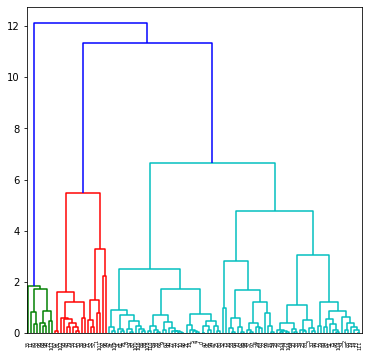

In [0]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendogram=sch.dendrogram(sch.linkage(x, method  = "ward"))

In [0]:
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [0]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'R_7']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['R_7 Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters
Country,,,,,,,,,
Afghanistan,13036,235,1209,11592,1.802700,9.274317,98.197300,1.112813,1
Albania,1076,33,823,220,3.066914,76.486989,96.933086,2.057692,1
Algeria,8997,630,5277,3090,7.002334,58.652884,92.997666,0.986014,1
Andorra,763,51,681,31,6.684142,89.252949,93.315858,1.000000,4
Angola,74,4,18,52,5.405405,24.324324,94.594595,0.761905,4
...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,1.000000,4
Yemen,278,57,11,210,20.503597,3.956835,79.496403,0.861702,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,1.143713,2


In [0]:
clusters.predict(np.asarray(countrywise.loc['Nigeria'][['Mortality', 'R_7']]).reshape(1,-1))

array([1], dtype=int32)

In [0]:
summary = pd.concat([countrywise[countrywise['R_7 Clusters'] == 0].head(10),countrywise[countrywise['R_7 Clusters'] == 1].head(10),countrywise[countrywise['R_7 Clusters'] == 2].head(10),countrywise[countrywise['R_7 Clusters'] == 4].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters
Country,,,,,,,,,
Bahrain,10052.00,15.00,5419.00,4618.00,0.15,53.91,99.85,0.86,0.00
Belarus,39858.00,219.00,16660.00,22979.00,0.55,41.80,99.45,0.99,0.00
Ghana,7303.00,34.00,2412.00,4857.00,0.47,33.03,99.53,1.09,0.00
Guinea,3553.00,22.00,1950.00,1581.00,0.62,54.88,99.38,0.79,0.00
Iceland,1805.00,10.00,1792.00,3.00,0.55,99.28,99.45,1.00,0.00
Kazakhstan,9576.00,37.00,4900.00,4639.00,0.39,51.17,99.61,0.99,0.00
Maldives,1513.00,5.00,197.00,1311.00,0.33,13.02,99.67,1.07,0.00
Oman,9009.00,40.00,2177.00,6792.00,0.44,24.16,99.56,1.02,0.00
Qatar,50914.00,33.00,15399.00,35482.00,0.06,30.25,99.94,1.10,0.00


In [0]:
print('Average mortality of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['Mortality'].mean())
print('Average R_7 of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['R_7'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['Mortality'].mean())
print('Average R_7 of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['R_7'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['Mortality'].mean())
print('Average R_7 of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['R_7'].mean())

Average mortality of cluster 0: 0.38020627723146033
Average R_7 of cluster 0: 0.9747750328944423
Average mortality of cluster 1: 4.451465182760417
Average R_7 of cluster 1: 1.038649951849594
Average mortality of cluster 2: 0.9030086009029986
Average R_7 of cluster 2: 1.830027984713088


In [0]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['R_7 Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Bahrain', 'Belarus', 'Ghana', 'Guinea', 'Iceland', 'Kazakhstan',
       'Maldives', 'Oman', 'Qatar', 'Saudi Arabia', 'Singapore'],
      dtype='object', name='Country')


In [0]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['R_7 Clusters'] == 1].index)

Countries that belong to cluster 1:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Cote d'Ivoire', 'Croatia',
       'Cuba', 'Czechia', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Guatemala', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Japan',
       'Kenya', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Mexico',
       'Moldova', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria',
       'North Macedonia', 'Norway', 'Pakistan', 'Panama', 'Peru',
       'Phil

In [0]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['R_7 Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Gabon', 'Israel', 'Nepal', 'Sri Lanka', 'Thailand', 'Uzbekistan',
       'Zambia'],
      dtype='object', name='Country')


## Clusters based on the mortality rate and the recovery rate

In [0]:
x = []
x = countrywise[['Mortality', 'Recovery']][countrywise['Confirmed']>1000]
std = StandardScaler() #K-means is a distance based algorithm
  
x = std.fit_transform(x)

Using dendogram to know the possible number of clusters

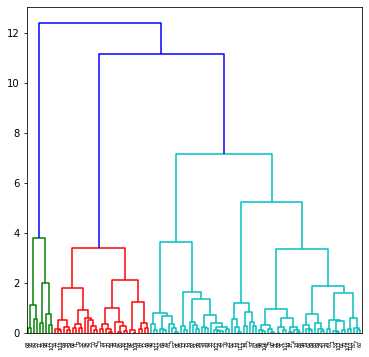

In [0]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendogram=sch.dendrogram(sch.linkage(x, method  = "ward"))

It seams like that we can work with 3 clusters

In [0]:
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [0]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'Recovery']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,13036,235,1209,11592,1.802700,9.274317,98.197300,1.112813,1,0
Albania,1076,33,823,220,3.066914,76.486989,96.933086,2.057692,1,0
Algeria,8997,630,5277,3090,7.002334,58.652884,92.997666,0.986014,1,0
Andorra,763,51,681,31,6.684142,89.252949,93.315858,1.000000,4,4
Angola,74,4,18,52,5.405405,24.324324,94.594595,0.761905,4,4
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,1.000000,4,4
Yemen,278,57,11,210,20.503597,3.956835,79.496403,0.861702,4,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,1.143713,2,0


In [0]:
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,13036,235,1209,11592,1.802700,9.274317,98.197300,1.112813,1,0
Albania,1076,33,823,220,3.066914,76.486989,96.933086,2.057692,1,0
Algeria,8997,630,5277,3090,7.002334,58.652884,92.997666,0.986014,1,0
Andorra,763,51,681,31,6.684142,89.252949,93.315858,1.000000,4,4
Angola,74,4,18,52,5.405405,24.324324,94.594595,0.761905,4,4
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,1.000000,4,4
Yemen,278,57,11,210,20.503597,3.956835,79.496403,0.861702,4,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,1.143713,2,0


In [0]:
summary = pd.concat([countrywise[countrywise['Clusters'] == 0].head(10),countrywise[countrywise['Clusters'] == 1].head(10),countrywise[countrywise['Clusters'] == 2].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,13036.00,235.00,1209.00,11592.00,1.80,9.27,98.20,1.11,1.00,0.00
Albania,1076.00,33.00,823.00,220.00,3.07,76.49,96.93,2.06,1.00,0.00
Algeria,8997.00,630.00,5277.00,3090.00,7.00,58.65,93.00,0.99,1.00,0.00
Argentina,14702.00,508.00,4617.00,9577.00,3.46,31.40,96.54,1.19,1.00,0.00
Armenia,8216.00,113.00,3287.00,4816.00,1.38,40.01,98.62,1.19,1.00,0.00
Australia,7165.00,103.00,6576.00,486.00,1.44,91.78,98.56,1.17,1.00,0.00
Austria,16628.00,668.00,15286.00,674.00,4.02,91.93,95.98,0.86,1.00,0.00
Azerbaijan,4759.00,56.00,3022.00,1681.00,1.18,63.50,98.82,1.19,1.00,0.00
Bahrain,10052.00,15.00,5419.00,4618.00,0.15,53.91,99.85,0.86,0.00,0.00


In [0]:
print('Average mortality of cluster 0:', countrywise[countrywise['Clusters']==0]['Mortality'].mean())
print('Average recovery of cluster 0:', countrywise[countrywise['Clusters']==0]['Recovery'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['Clusters']==1]['Mortality'].mean())
print('Average recovery of cluster 1:', countrywise[countrywise['Clusters']==1]['Recovery'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['Clusters']==2]['Mortality'].mean())
print('Average recovery of cluster 2:', countrywise[countrywise['Clusters']==2]['Recovery'].mean())

Average mortality of cluster 0: 3.588662374106557
Average recovery of cluster 0: 54.34358754730462
Average mortality of cluster 1: nan
Average recovery of cluster 1: nan
Average mortality of cluster 2: 10.34138000795953
Average recovery of cluster 2: 4.099401490624759


In [0]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Thailand', 'Tunisia', 'Turkey', 'USA', 'Ukraine',
       'United Arab Emirates', 'Uzbekistan', 'Venezuela', 'Zambia', 'Global'],
      dtype='object', name='Country', length=108)


In [0]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['Clusters'] == 1].index)

Countries that belong to cluster 1:  Index([], dtype='object', name='Country')


In [0]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Haiti', 'Netherlands', 'Sweden', 'United Kingdom'], dtype='object', name='Country')


Cluster 0: Countries that have a **High mortality** rate and **High recovery** rate 

---


Cluster 1: Countries that have **Low mortality** rate and **High recovery** rate

---


Cluster 2: Countries that have **Low mortality** rate and **Good recovery** rate